In [1]:
#These are all of the preloaded directories needed for this model.
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, backend, layers, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [2]:
#These are the base directories in the bird image files.
directory = "/kaggle/input/hummingbird-finder-data-2/Bird Present2"
train_dir = directory + '/train'
test_dir = directory + '/test'
valid_dir = directory + '/valid'

#Random seed so my data is consistent from run to run. The meaning of life and everything.
np.random.seed(42)

#These are the data generators used for bringing the data over. Augmentation is used only on the training dataset.
datagen = ImageDataGenerator(rescale=1./255,)
traindatagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# Pull from the directory comands.
batch_size = 16
train_data = traindatagen.flow_from_directory(train_dir, target_size=(300,300), shuffle=True, batch_size=batch_size, class_mode='binary')
val_data = datagen.flow_from_directory(valid_dir, target_size=(300,300), shuffle=True, batch_size=batch_size, class_mode='binary')
test_data = datagen.flow_from_directory(test_dir, target_size=(300,300), batch_size=batch_size, class_mode='binary')

# Group sizes used later for the epoch step sizes.
valid_groups = len(val_data)
train_groups= len(train_data)
test_groups= len(test_data)

Found 1113 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


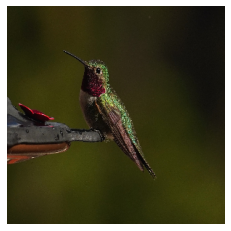

Figures are  (300, 300, 3)


In [3]:
#Load an image and determine image shape for analysis.
IMAGE = load_img(directory + "/hummingbirds/007.png")
                 
plt.imshow(IMAGE)
plt.axis("off")
plt.show()

IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape
print('Figures are ', SHAPE)

In [4]:
backend.clear_session()
model1 = Sequential()

model1.add(Flatten(input_shape = SHAPE)) 

model1.add(Dense(256)) #Updated for number of classes
model1.add(Activation('relu'))

model1.add(Dense(128)) #Updated for number of classes
model1.add(Activation('relu'))

model1.add(Dense(64)) #Updated for number of classes
model1.add(Activation('relu'))

model1.add(Dense(1)) #Updated for number of classes
model1.add(Activation('sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 270000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               69120256  
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0

In [5]:
# Compile
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
#fit model
history = model1.fit_generator( 
    train_data, 
    steps_per_epoch = train_groups,
    epochs = 50,
    validation_data = val_data,
    validation_steps = valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 10, restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1)])

Train for 70 steps, validate for 8 steps
Epoch 1/50
70/70 [==============================] - 39s 555ms/step - loss: 7.7623 - accuracy: 0.6577 - val_loss: 1.6124 - val_accuracy: 0.8167
Epoch 2/50
70/70 [==============================] - 34s 491ms/step - loss: 4.2388 - accuracy: 0.7053 - val_loss: 9.8629 - val_accuracy: 0.5167
Epoch 3/50
70/70 [==============================] - 35s 502ms/step - loss: 2.0568 - accuracy: 0.7260 - val_loss: 0.7183 - val_accuracy: 0.8083
Epoch 4/50
70/70 [==============================] - 35s 504ms/step - loss: 1.1277 - accuracy: 0.7601 - val_loss: 0.2384 - val_accuracy: 0.9167
Epoch 5/50
70/70 [==============================] - 35s 503ms/step - loss: 0.5718 - accuracy: 0.8149 - val_loss: 0.2416 - val_accuracy: 0.9167
Epoch 6/50
70/70 [==============================] - 35s 498ms/step - loss: 0.3570 - accuracy: 0.8544 - val_loss: 0.3706 - val_accuracy: 0.8750
Epoch 7/50
69/70 [============================>.] - ETA: 0s - loss: 0.3617 - accuracy: 0.8733
Epoch 0

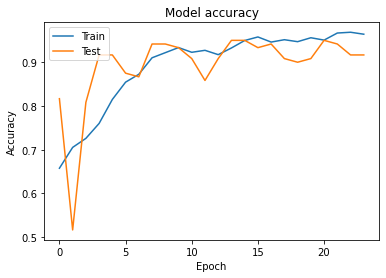

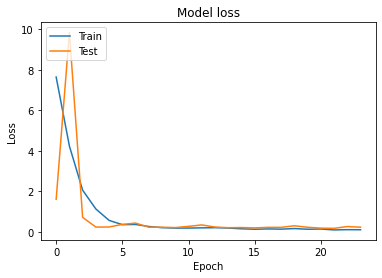

2/2 [==============================] - 0s 77ms/step - loss: 0.4400 - accuracy: 0.8000
Test loss: 44.0 %
Test accuracy: 80.0 %


In [6]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model1.evaluate(test_data, verbose=1)
print('Test loss:', round(100*scores[0]),"%")
print('Test accuracy:', round(100*scores[1]), '%')

In [7]:
results = model1.predict_generator(test_data)
print(np.round(results, decimals=1))
test_data.classes

[[0. ]
 [0.1]
 [0.5]
 [0.8]
 [1. ]
 [0.3]
 [0.9]
 [0. ]
 [0.8]
 [1. ]
 [0.8]
 [0.2]
 [0.2]
 [0.2]
 [0.8]
 [0. ]
 [0.9]
 [0. ]
 [0. ]
 [1. ]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [9]:
model1.save('fourth_try-80.h5')